<a href="https://colab.research.google.com/github/SeathWR/Proyectos_hobby/blob/main/Reporte_gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data_gym = pd.read_csv('/content/gym_members_exercise_tracking.csv')
data_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
data_gym.columns = data_gym.columns.str.strip()   #eliminamos cualquier espacio en blanco
data_gym.columns = data_gym.columns.str.replace('_', ' ')   #reemplazamos el _ por blanco
print(data_gym.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max BPM', 'Avg BPM',
       'Resting BPM', 'Session Duration (hours)', 'Calories Burned',
       'Workout Type', 'Fat Percentage', 'Water Intake (liters)',
       'Workout Frequency (days/week)', 'Experience Level', 'BMI'],
      dtype='object')


Este código en Python está diseñado para generar un resumen de las columnas de un DataFrame df utilizando pandas.

Función column_summary
La función column_summary toma como entrada un DataFrame df y genera un DataFrame resumido con información sobre cada columna.



In [7]:
def column_summary(data_gym):
    summary_data = []         #Se crea una lista vacía para almacenar los datos resumidos de cada columna.

    for col_name in data_gym.columns:       #Se itera sobre cada nombre de columna en el DataFrame df
        col_dtype = data_gym[col_name].dtype     #Obtiene el tipo de dato de la columna.
        num_of_nulls = data_gym[col_name].isnull().sum()       #Cuenta el número de valores nulos en la columna.
        num_of_non_nulls = data_gym[col_name].notnull().sum()   #Cuenta el número de valores no nulos en la columna.
        num_of_distinct_values = data_gym[col_name].nunique()   #Cuenta el número de valores únicos en la columna.

        if num_of_distinct_values <= 10:         #Si la columna tiene 10 o menos valores distintos, obtiene el conteo de todos los valores.
            distinct_values_counts = data_gym[col_name].value_counts().to_dict()
        else:                       #Si la columna tiene más de 10 valores distintos, obtiene el conteo de los 10 valores más frecuentes.
            top_10_values_counts = data_gym[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,

        })

    summary_data_gym = pd.DataFrame(summary_data)
    return summary_data_gym


summary_data_gym = column_summary(data_gym)
display(summary_data_gym)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Age,int64,0,973,42
1,Gender,object,0,973,2
2,Weight (kg),float64,0,973,532
3,Height (m),float64,0,973,51
4,Max BPM,int64,0,973,40
5,Avg BPM,int64,0,973,50
6,Resting BPM,int64,0,973,25
7,Session Duration (hours),float64,0,973,147
8,Calories Burned,float64,0,973,621
9,Workout Type,object,0,973,4


In [8]:
numerical_cols =  data_gym.select_dtypes(exclude=['object', 'category']).columns

categorical_cols = data_gym.select_dtypes(include=['object', 'category']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max BPM', 'Avg BPM', 'Resting BPM',
       'Session Duration (hours)', 'Calories Burned', 'Fat Percentage',
       'Water Intake (liters)', 'Workout Frequency (days/week)',
       'Experience Level', 'BMI'],
      dtype='object')
Index(['Gender', 'Workout Type'], dtype='object')


#EDA

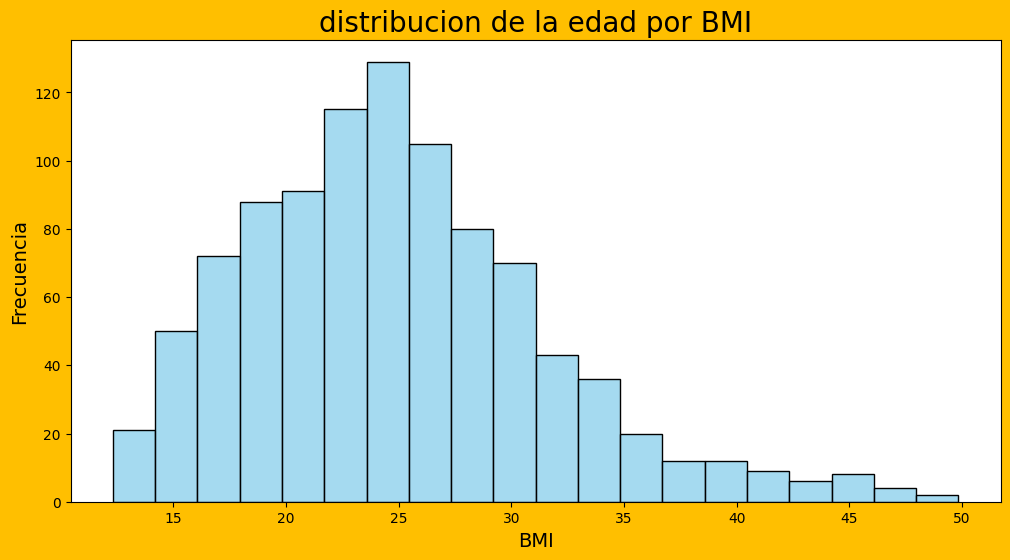

In [11]:
#distribucion por edad BMI
plt.figure(figsize=(12, 6))
sns.histplot(data_gym['BMI'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('distribucion de la edad por BMI', fontsize = 20)
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.gcf().set_facecolor('#FFBF00')
plt.show()

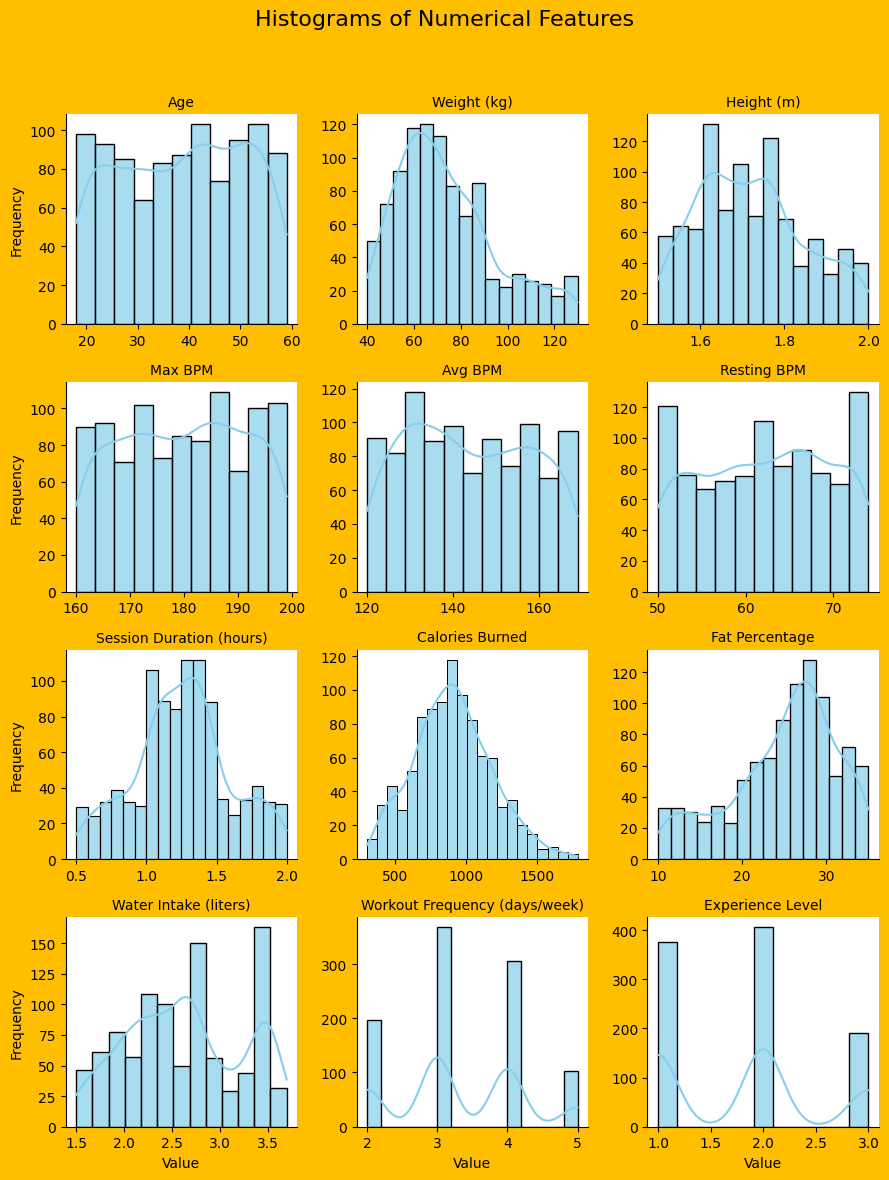

In [13]:
numerical_cols = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max BPM', 'Avg BPM',
    'Resting BPM', 'Session Duration (hours)', 'Calories Burned',
    'Fat Percentage', 'Water Intake (liters)',
    'Workout Frequency (days/week)', 'Experience Level'
]

data_gym_melted = data_gym[numerical_cols].melt(var_name='Feature', value_name='Value')  #El método melt en pandas se utiliza para reestructurar el DataFrame, transformando las columnas en filas. Esto es útil para convertir un DataFrame de formato ancho a formato largo.

g = sns.FacetGrid(data_gym_melted, col='Feature', col_wrap=3, height=3, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True, color = 'skyblue', edgecolor = 'black', alpha = 0.7)
g.set_titles('{col_name}')
g.set_axis_labels('Value', 'Frequency')
g.fig.suptitle('Histograms of Numerical Features', fontsize=16)
g.fig.tight_layout(rect=[0,0,1,0.95])
plt.gcf().set_facecolor('#FFBF00')
plt.show()

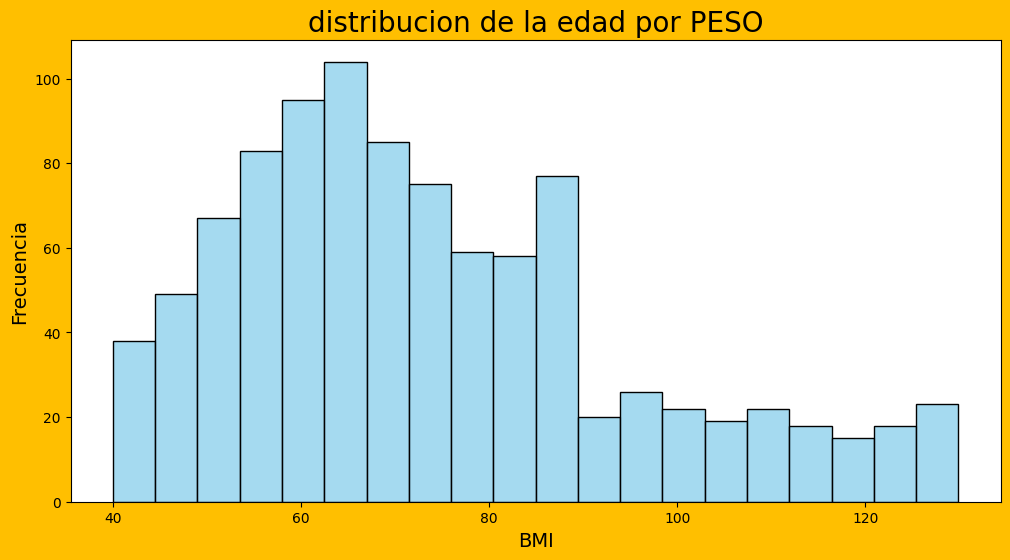

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data_gym['Weight (kg)'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title('distribucion de la edad por PESO', fontsize = 20)
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Frecuencia', fontsize = 14)
plt.gcf().set_facecolor('#FFBF00')
plt.show()

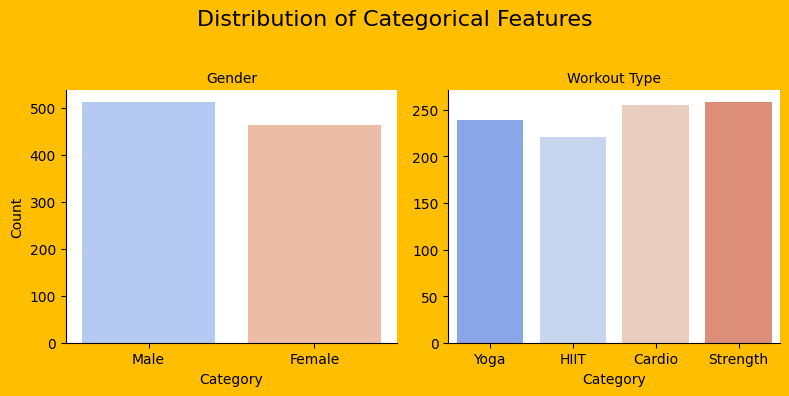

In [17]:
categorical_cols = ['Gender', 'Workout Type']

data_gym_melted_categorical = data_gym[categorical_cols].melt(var_name='Feature', value_name='Value')

g = sns.FacetGrid(data_gym_melted_categorical, col="Feature", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(sns.countplot, "Value", palette='coolwarm', order=None)
g.set_titles("{col_name}")
g.set_axis_labels("Category", "Count")
g.fig.suptitle("Distribution of Categorical Features", fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.gcf().set_facecolor('#FFBF00')
plt.show()

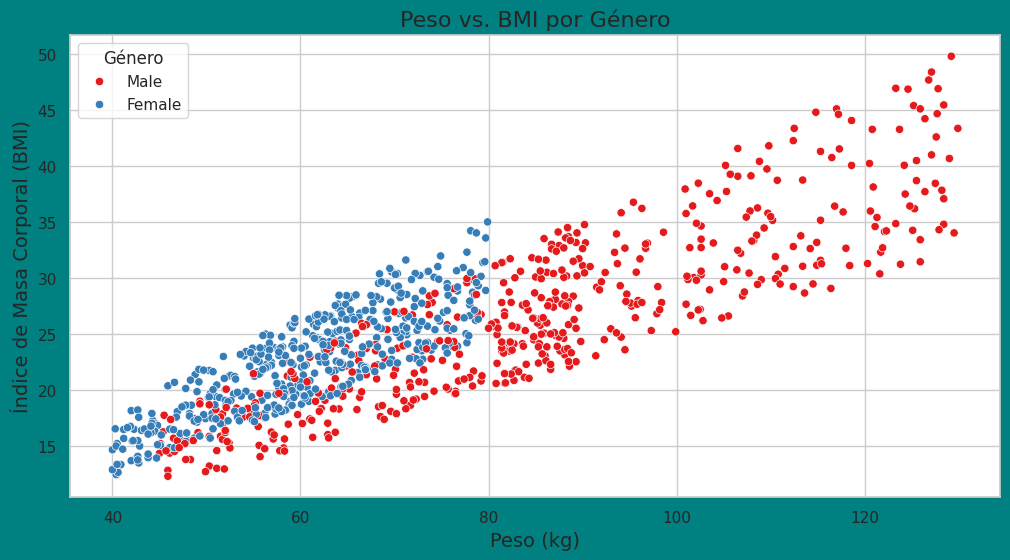

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_gym, x='Weight (kg)', y='BMI', hue='Gender', palette='Set1')
plt.title('Peso vs. BMI por Género', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=14)
plt.ylabel('Índice de Masa Corporal (BMI)', fontsize=14)
plt.legend(title='Género')
plt.gcf().set_facecolor('#008080')
plt.show()

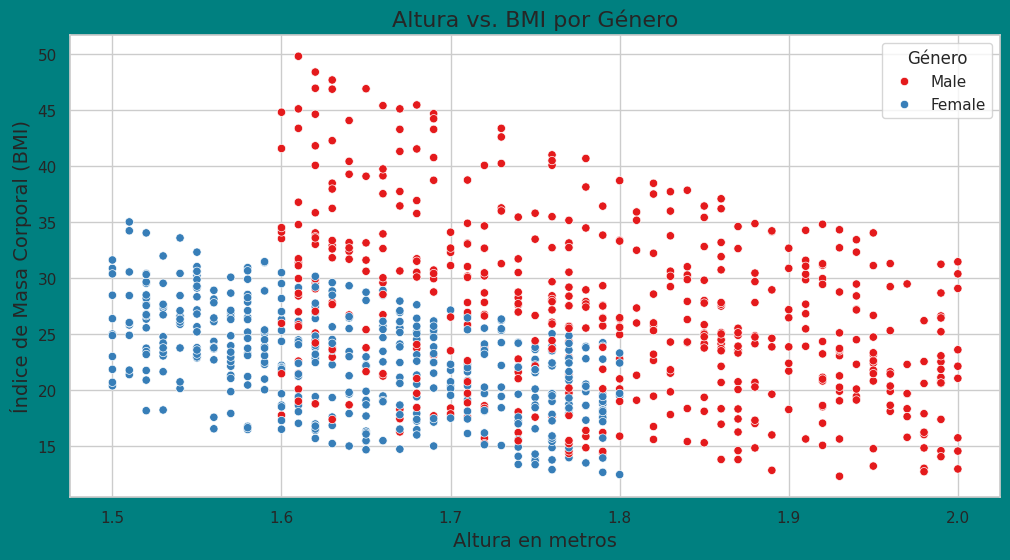

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_gym, x='Height (m)', y='BMI', hue='Gender', palette='Set1')
plt.title('Altura vs. BMI por Género', fontsize=16)
plt.xlabel('Altura en metros', fontsize=14)
plt.ylabel('Índice de Masa Corporal (BMI)', fontsize=14)
plt.legend(title='Género')
plt.gcf().set_facecolor('#008080')
plt.show()

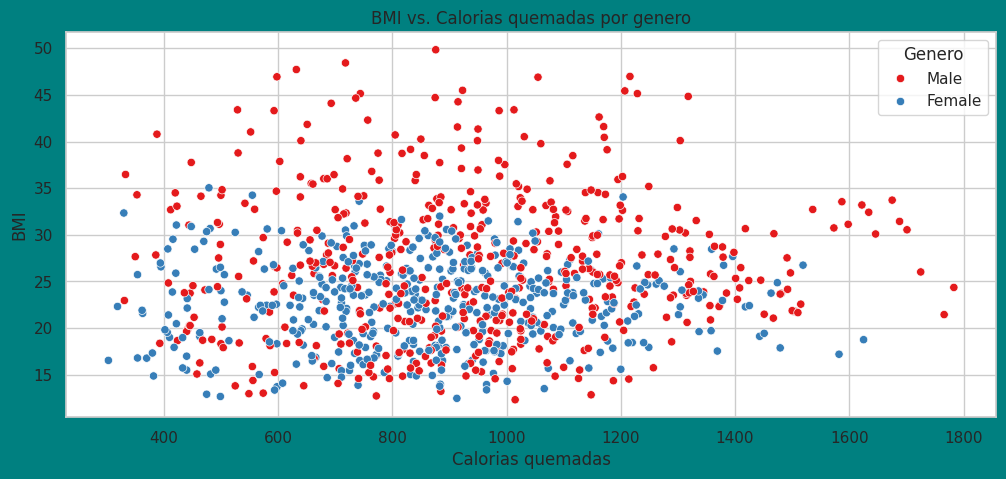

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))
sns.scatterplot(data=data_gym, x='Calories Burned', y='BMI', hue='Gender', palette='Set1')

plt.title('BMI vs. Calorias quemadas por genero')
plt.xlabel('Calorias quemadas')
plt.ylabel('BMI')
plt.legend(title='Genero')
plt.gcf().set_facecolor('#008080')
plt.show()

#Progreso

In [28]:
df1=data_gym.copy()

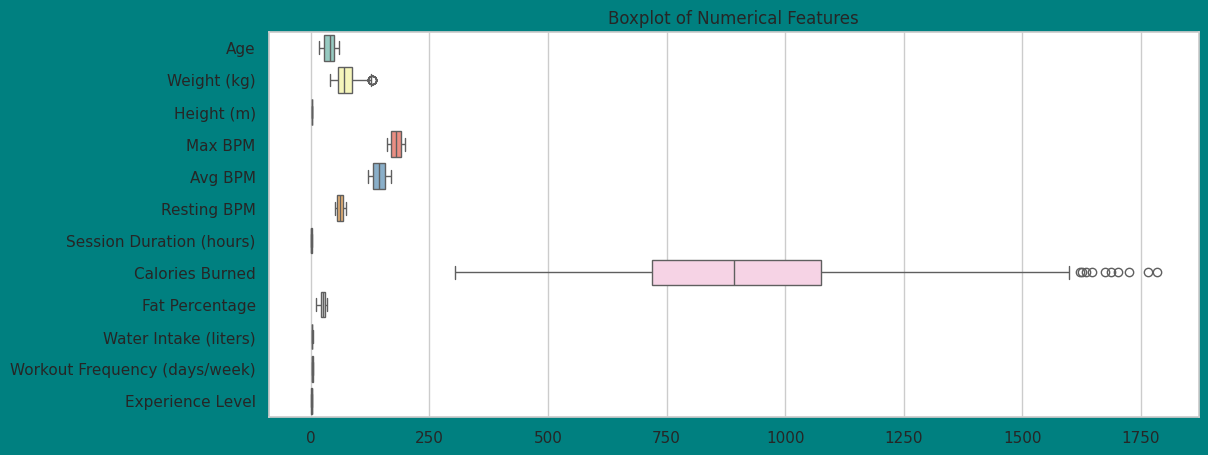

In [29]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df1[['Age', 'Weight (kg)', 'Height (m)', 'Max BPM', 'Avg BPM', 'Resting BPM', 'Session Duration (hours)', 'Calories Burned', 'Fat Percentage', 'Water Intake (liters)', 'Workout Frequency (days/week)', 'Experience Level']], orient='h', palette='Set3')
plt.title('Boxplot of Numerical Features')
plt.gcf().set_facecolor('#008080')
plt.show()

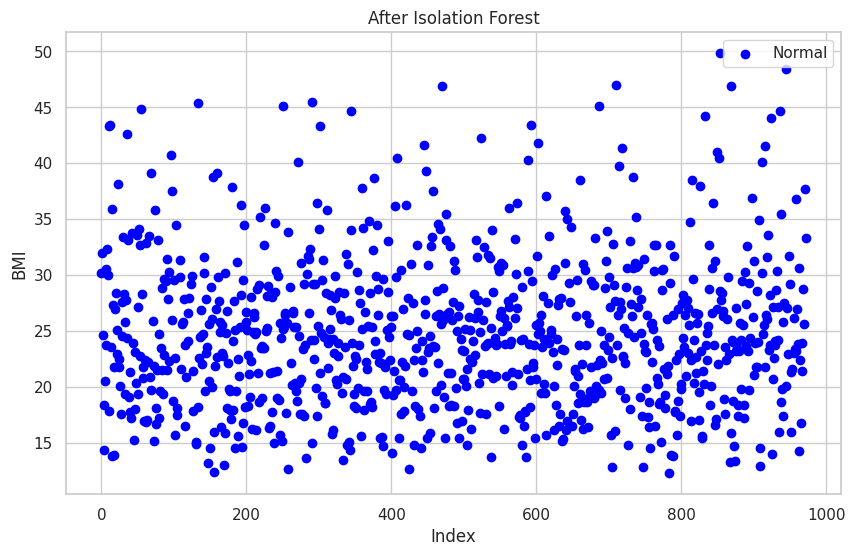

In [31]:
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'Max BPM', 'Avg BPM',
                      'Resting BPM', 'Session Duration (hours)', 'Calories Burned',
                      'Fat Percentage', 'Water Intake (liters)',
                      'Workout Frequency (days/week)']

numerical_features = [col for col in numerical_features if col in data_gym.columns]

scaler = StandardScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

model = IsolationForest(contamination=0.05, random_state=42)
df1['outlier'] = model.fit_predict(df1[numerical_features])

df1 = df1[df1['outlier'] == 1]

if 'BMI' in df1.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df1.index, df1['BMI'], c='blue', label='Normal')
    plt.xlabel("Index")
    plt.ylabel("BMI")
    plt.title("Detección de Anomalías")
    plt.legend()
    plt.show()

In [32]:
encoder = OrdinalEncoder()
df1[categorical_cols] = encoder.fit_transform(df1[categorical_cols])

#Modelando

In [33]:
X = df1.drop(['BMI'], axis=1).values
y = df1['BMI'].values


X = X.astype('float')
y = y.astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [34]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))  # Regression output layer with linear activation

model.compile(loss='mse', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2, validation_split=0.2, callbacks=[early_stopping])

yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)

Epoch 1/150
19/19 - 1s - 75ms/step - loss: 703.8986 - val_loss: 666.0740
Epoch 2/150
19/19 - 0s - 5ms/step - loss: 679.4415 - val_loss: 643.0810
Epoch 3/150
19/19 - 0s - 4ms/step - loss: 656.1242 - val_loss: 620.0272
Epoch 4/150
19/19 - 0s - 8ms/step - loss: 631.0259 - val_loss: 591.3174
Epoch 5/150
19/19 - 0s - 8ms/step - loss: 599.4452 - val_loss: 555.4638
Epoch 6/150
19/19 - 0s - 5ms/step - loss: 558.7431 - val_loss: 510.6732
Epoch 7/150
19/19 - 0s - 7ms/step - loss: 508.2857 - val_loss: 455.2804
Epoch 8/150
19/19 - 0s - 4ms/step - loss: 445.5435 - val_loss: 388.8431
Epoch 9/150
19/19 - 0s - 8ms/step - loss: 371.7940 - val_loss: 314.7129
Epoch 10/150
19/19 - 0s - 5ms/step - loss: 293.1364 - val_loss: 239.7118
Epoch 11/150
19/19 - 0s - 5ms/step - loss: 216.2024 - val_loss: 171.1076
Epoch 12/150
19/19 - 0s - 4ms/step - loss: 148.9650 - val_loss: 116.8389
Epoch 13/150
19/19 - 0s - 5ms/step - loss: 100.2549 - val_loss: 79.3094
Epoch 14/150
19/19 - 0s - 8ms/step - loss: 69.4053 - val_los

#Evaluacion del modelo

In [35]:
mse = mean_squared_error(y_test, yhat)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, yhat)

print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R-squared: {r2:.3f}')

MSE: 0.848
RMSE: 0.921
R-squared: 0.979


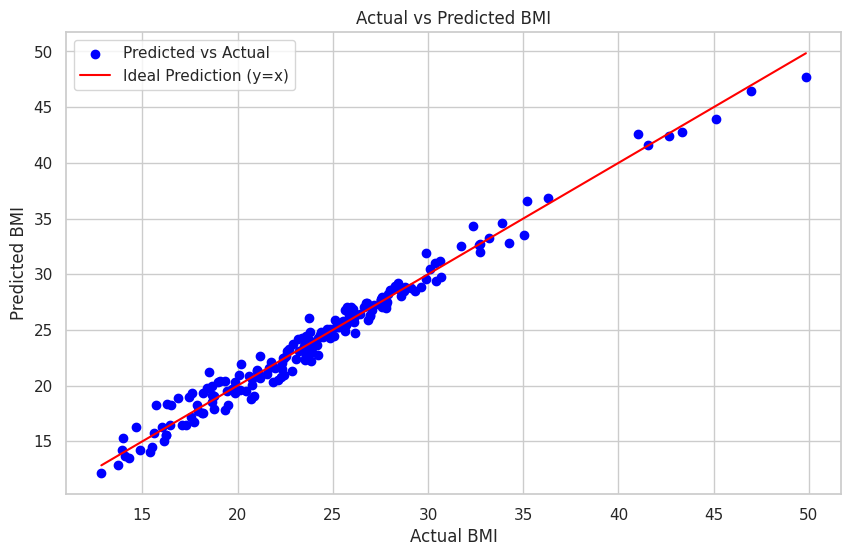

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Prediction (y=x)')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs Predicted BMI')
plt.legend()
plt.show()